# Import Package Needed

In [2]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for forecasting
from fbprophet import Prophet

In D:\Users\bsi80086\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\bsi80086\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Users\bsi80086\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Users\bsi80086\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor 

# Data Loading

In [3]:
sales = pd.read_csv('train.csv')
sales.head()

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
0,2019-07-31,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
1,2019-08-01,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2,2019-08-02,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
3,2019-08-03,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
4,2019-08-04,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
periode                       425 non-null object
cash_in_echannel              425 non-null float64
cash_out_echannel             425 non-null float64
cash_in_kantor                425 non-null float64
cash_out_kantor               425 non-null float64
cr_ketetapan_total_bkn_sum    425 non-null float64
giro                          425 non-null float64
deposito                      425 non-null float64
kewajiban_lain                425 non-null float64
tabungan                      425 non-null float64
rata_dpk_mingguan             425 non-null float64
kas_kantor                    425 non-null float64
kas_echannel                  425 non-null float64
dtypes: float64(12), object(1)
memory usage: 43.3+ KB


# Data Processing

In [5]:
sales['periode'] = pd.to_datetime(sales['periode'], dayfirst=True)
sales.sort_values('periode', inplace=True)

In [6]:
sales.head()

,periode,cash_in_echannel,cash_out_echannel,cash_in_kantor,cash_out_kantor,cr_ketetapan_total_bkn_sum,giro,deposito,kewajiban_lain,tabungan,rata_dpk_mingguan,kas_kantor,kas_echannel
0,2019-07-31,7.303000e+08,-1.304400e+09,1.436722e+11,-1.106104e+11,3.0,9.867358e+11,8.048153e+11,1.419685e+10,7.072647e+11,3.135744e+11,1.928940e+09,2.939100e+09
1,2019-08-01,7.322000e+08,-8.321500e+08,3.144131e+11,-6.710987e+10,3.0,8.962459e+11,8.125611e+11,1.234062e+10,7.011995e+11,3.135744e+11,2.492322e+11,2.839150e+09
2,2019-08-02,1.169800e+09,-6.214000e+08,1.251294e+09,-1.142332e+09,3.0,9.059714e+11,8.127225e+11,1.182022e+10,6.922787e+11,3.135744e+11,2.493411e+11,3.387550e+09
3,2019-08-03,9.134500e+08,-4.240500e+08,0.000000e+00,0.000000e+00,3.0,9.057127e+11,8.127253e+11,1.199640e+10,6.867224e+11,3.135744e+11,2.493411e+11,3.876950e+09
4,2019-08-04,7.752500e+08,-7.779500e+08,9.883331e+10,-8.729274e+10,3.0,9.788347e+11,8.124711e+11,1.232962e+10,6.813438e+11,3.135744e+11,2.608817e+11,3.874250e+09


### Prepare the data

To use the `fbprophet` package, we first need to prepare our time series data into a specific format data frame required by the package. The data frame requires 2 columns:

- `ds`: the time stamp column, stored in `datetime64` data type
- `y`: the value to be forecasted

In this example, we will be using the `total_qty` as the value to be forecasted.

In [7]:
#rename columns
daily_total_qty = sales[['periode', 'kas_echannel']].rename(
    columns={'periode': 'ds',
             'kas_echannel': 'y'})

In [8]:
daily_total_qty.head()

,ds,y
0,2019-07-31,2.939100e+09
1,2019-08-01,2.839150e+09
2,2019-08-02,3.387550e+09
3,2019-08-03,3.876950e+09
4,2019-08-04,3.874250e+09


# Modeling using `fbprophet`

A very fundamental part in understanding time series is to be able to **decompose** its underlying components. A classic way in describing a time series is using **General Additive Model (GAM)**. This definition describes time series as a summation of its components. As a starter, we will define time series with 3 different components:

- Trend ($T$): Long term movement in its mean
- Seasonality ($S$): Repeated seasonal effects
- Residuals ($E$): Irregular components or random fluctuations not described by trend and seasonality

The idea of GAM is that each of them is added to describe our time series:

$Y(t) = T(t) + S(t) + E(t)$

When we are discussing time series forecasting there is one main assumption that needs to be remembered: **We assume correlation among successive observations**. Means that the idea of performing a forecasting for a time series is based on its past behavior. So in order to forecast the future values, we will take a look at any existing trend and seasonality of the time series and use it to generate future values.

Prophet enhanced the classical trend and seasonality components by adding a **holiday effect**. It will try to model the effects of holidays which occur on some dates and has been proven to be really useful in many cases. Take, for example: Lebaran Season. In Indonesia, it is really common to have an effect on Lebaran season. The effect, however, is a bit different from a classic seasonality effect because it shows the characteristics of an **irregular schedule**.

### Fitting Model

Let’s initiate a `fbprophet` object using `Prophet()` and fit the `daily_total_qty` data. The idea of fitting a time series model is to extract the pattern information of a time series in order to perform a forecasting over the specified period of time.

In [14]:
model_31 = Prophet(yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True)
model_31.fit(daily_total_qty)

### Forecasting

Based on the existing data, we'd like to perform a forecasting for **1 years into the future**. To do that, we will need to first prepare a data frame that consist of the future time stamp range we'd like to forecast. Luckily, `fbprophet` has provided `.make_future_dataframe()` method that help us to prepare the data:

In [15]:
future_31 = model_31.make_future_dataframe(periods=31, freq='D')
future_31.tail()

,ds
451,2020-10-27
452,2020-10-28
453,2020-10-29
454,2020-10-30
455,2020-10-31


Now we have acquired a new `future_31` data frame that consist of a date span of **the beginning of a time series to 365 days into the future**. We will then use this data frame is to perform the forecasting by using `.predict()` method of our `model_31`:

In [16]:
forecast_31 = model_31.predict(future_31)
forecast_31[['ds', 'trend', 'weekly', 'yearly', 'yhat']]

,ds,trend,weekly,yearly,yhat
0,2019-07-31,1.473235e+08,-2.044955e+08,-6.275996e+08,1.678807e+09
1,2019-08-01,1.524910e+08,-2.288749e+08,-5.031975e+08,1.783997e+09
2,2019-08-02,1.576585e+08,-3.169957e+07,-3.738904e+08,2.115647e+09
3,2019-08-03,1.628260e+08,4.316278e+08,-2.409787e+08,2.717053e+09
4,2019-08-04,1.679935e+08,1.777184e+08,-1.058404e+08,2.603450e+09
...,...,...,...,...,...
451,2020-10-27,2.569711e+09,-1.641284e+08,3.115168e+08,5.080678e+09
452,2020-10-28,2.575155e+09,-2.044955e+08,3.032581e+08,5.037496e+09
453,2020-10-29,2.580598e+09,-2.288749e+08,2.919824e+08,5.007284e+09
454,2020-10-30,2.586042e+09,-3.169957e+07,2.780078e+08,5.195928e+09


### Visualize

Now, observe how `.plot()` method take our model_31, and newly created forecast_31 object to create a `matplotlib` object that shows the forecasting result. The black points in the plot shows the **actual** time series, and the blue line shows the **fitted** time series along with its forecasted values 365 days into the future.

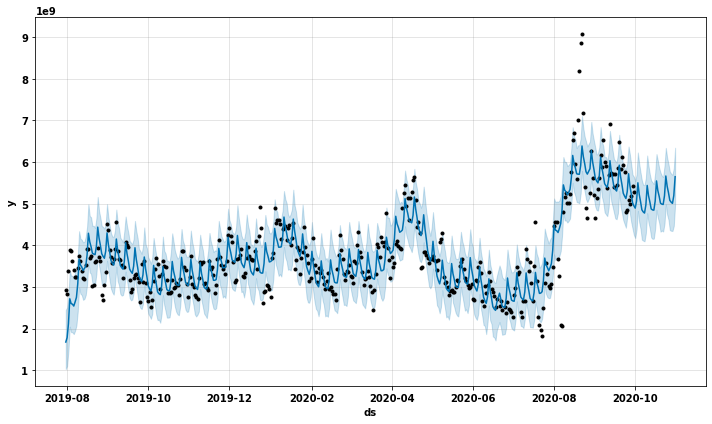

In [17]:
fig = model_31.plot(forecast_31)

#### We can also visualize each of the trend and seasonality components using `.plot_components` method.

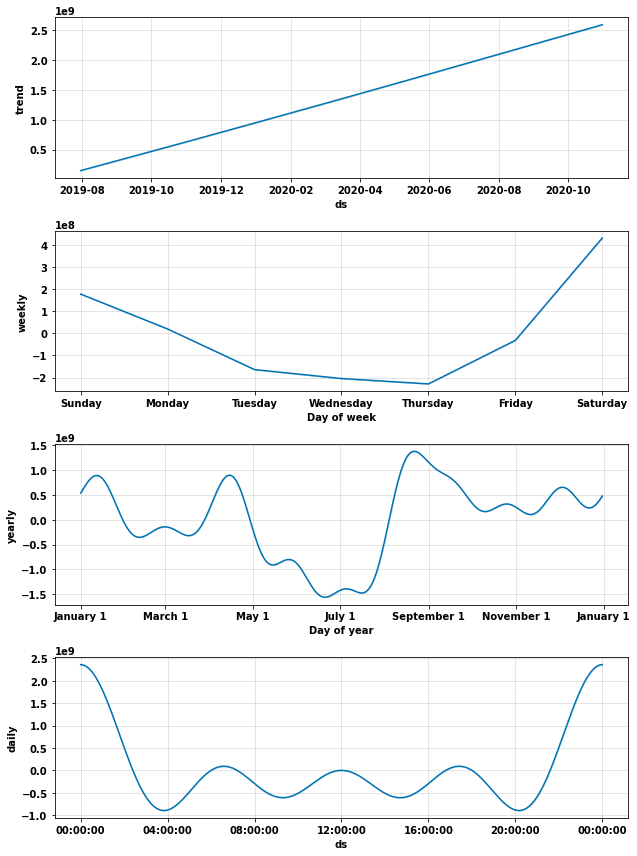

In [18]:
fig_componen = model_31.plot_components(forecast_31)

### Adjusting Trend Flexibility

Prophet provided us a tuning parameter to adjust the detection flexibility:

- `n_changepoints` (default = 25): The number of potential changepoints, **not recommended** to be tuned, this is better tuned by adjusting the regularization (`changepoint_prior_scale`)
- `changepoint_range` (default = 0.8): Proportion of the history in which the trend is allowed to change. Recommended range: [0.8, 0.95]
- `changepoint_prior_scale` (default = 0.05): The flexibility of the trend, and in particular how much the trend changes at the trend changepoints. Recommended range: [0.001, 0.5]

💡 Increasing the default value of the parameter above will give extra flexibility to the trend line (overfitting the training data). On the other hand, decreasing the value will cause the trend to be less flexible (underfitting).

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


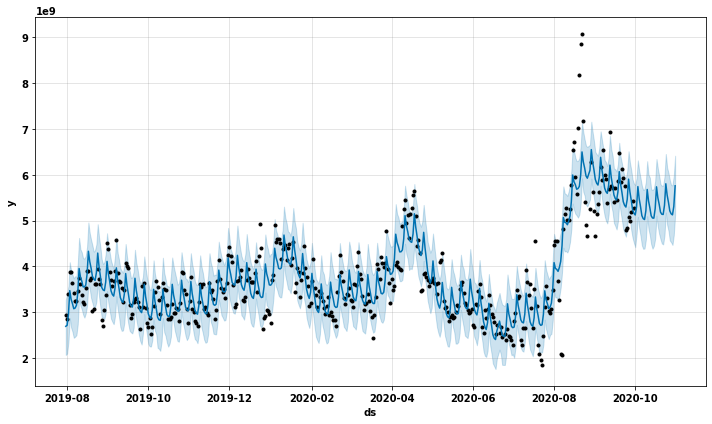

In [19]:
# fitting model
model_tuning_trend = Prophet(
    n_changepoints=25, # default = 25
    changepoint_range=0.8, # default = 0.8
    changepoint_prior_scale=0.5, # default = 0.05
    yearly_seasonality=True,
    weekly_seasonality=True)
model_tuning_trend.fit(daily_total_qty)

# forecasting
future = model_tuning_trend.make_future_dataframe(periods=31, freq='D')
forecast = model_tuning_trend.predict(future)

# visualize
fig = model_tuning_trend.plot(forecast)
#a = add_changepoints_to_plot(fig.gca(), model_tuning_trend, forecast)

### Fourier Order

Prophet uses a Fourier series to approximate the seasonality effect. It is a way of approximating a periodic function as a (possibly infinite) **sum of sine and cosine** functions. 

💡 The number of terms in the partial sum (the order) is a parameter that determines how quickly the seasonality can change. Increasing the fourier order will give extra flexibility to the seasonality (overfitting the training data), and vice versa.

Here is an interactive introduction to Fourier: http://www.jezzamon.com/fourier/

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


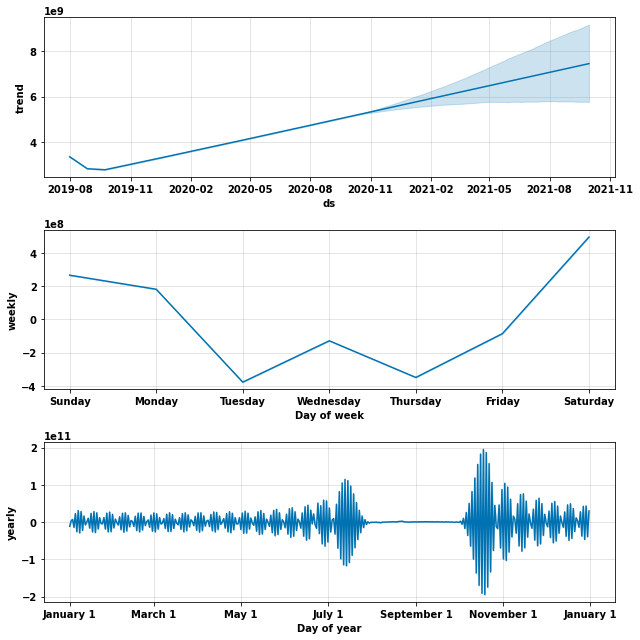

In [20]:
# fitting model
model_tuning_seasonality = Prophet(
    weekly_seasonality=3, # default = 3
    yearly_seasonality=200 # default = 10
    )
model_tuning_seasonality.fit(daily_total_qty)

# forecasting
future = model_tuning_seasonality.make_future_dataframe(periods=365, freq='D')
forecast = model_tuning_seasonality.predict(future)

# visualize
fig = model_tuning_seasonality.plot_components(forecast)

### Custom Seasonalities

The default provided seasonality modelled by Prophet for a daily sampled data is: weekly and yearly. 

Consider this case: a sales in your business is heavily affected by payday. Most customers tends to buy your product based on the day of the month. Since it did not follow the default seasonality of yearly and weekly, we will need to define a non-regular seasonality. There are two steps we have to do:
1. Remove default seasonality (eg: remove yearly seasonality) by setting `False`
2. Add seasonality (eg: add monthly seasonality) by using `.add_seasonality()` method before fitting the model

We ended up with formula:
$yhat(t) = T(t) + S_{weekly}(t) + \bf{S_{monthly}(t)}$

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


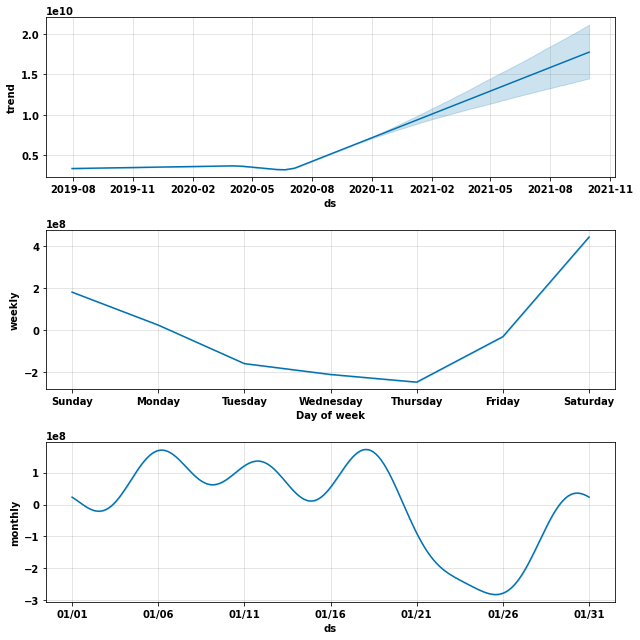

In [21]:
# fitting model
model_custom_seasonality = Prophet(
    yearly_seasonality=False ## remove seasonality
    )
## add seasonality
model_custom_seasonality.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_custom_seasonality.fit(daily_total_qty)

# forecasting
future = model_custom_seasonality.make_future_dataframe(periods=365, freq='D')
forecast = model_custom_seasonality.predict(future)

# visualize
fig = model_custom_seasonality.plot_components(forecast)

For monthly seasonality, we provided period = 30.5 indicating that there will be non-regular 30.5 frequency in one season of the data. The 30.5 is a common frequency quantifier for monthly seasonality, since there are some months with a total of 30 and 31 (some are 28 or 29).

💡 Recommended Fourier order according to the seasonality:
- weekly seasonality = 3
- monthly seasonality = 5
- yearly seasonality = 10

## Holiday Effects

One of the advantage in using Prophet is the ability to model a holiday effect. This holiday effect is defined as a non-regular effect that needs to be **manually** specified by the user.

We'll need to prepare a `holiday` data frame with the following column:

- `holiday`: the holiday unique name identifier
- `ds`: timestamp
- `lower_window`: how many time unit **behind** the holiday that is assumed to to be affected (smaller or equal than zero)
- `upper_window`: how many time unit **after** the holiday that is assumed to be affected (larger or equal to zero)

⚠️ It must include all occurrences of the holiday, both in the **past** (back as far as the historical data go) and in the **future** (out as far as the forecast is being made).

In [22]:
holiday = pd.DataFrame({
    'holiday': 'new_year_eve',
    'ds': pd.to_datetime(['2013-12-31', '2014-12-31', # past date, historical data 
                          '2015-12-31']), # future date, to be forecasted
    'lower_window': -4, # include 27th - 31st December
    'upper_window': 0})
holiday

,holiday,ds,lower_window,upper_window
0,new_year_eve,2013-12-31,-4,0
1,new_year_eve,2014-12-31,-4,0
2,new_year_eve,2015-12-31,-4,0


### Built-in Country Holidays

We can use a built-in collection of country-specific holidays using the `.add_country_holidays()` method before fitting model. For Indonesia, we can specify parameter `country_name='ID'`.

In [23]:
model_holiday_indo = Prophet()
model_holiday_indo.add_country_holidays(country_name='ID')
model_holiday_indo.fit(daily_total_qty)

model_holiday_indo.train_holiday_names

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Users\bsi80086\AppData\Local\Continuum\anaconda3\lib\site-packages\fbprophet\hdays.py:105: Warning:

We only support Nyepi holiday from 2009 to 2019



0               New Year's Day
1             Chinese New Year
2        Day of Silence/ Nyepi
3     Ascension of the Prophet
4                    Labor Day
5           Ascension of Jesus
6            Buddha's Birthday
7                Pancasila Day
8                  Eid al-Fitr
9             Independence Day
10      Feast of the Sacrifice
11        Birth of the Prophet
12                   Christmas
13            Islamic New Year
dtype: object

💡 We can also manually populate Indonesia holiday by using `hdays` module. This is useful if we want to take a look on the holiday dates and then manually include only certain holidays.
( Ref = https://github.com/facebook/prophet/blob/master/python/fbprophet/hdays.py )

In [24]:
from fbprophet import hdays
holidays_indo = hdays.Indonesia()
holidays_indo._populate(2020)
holidays_indo._populate(2021)

holiday = pd.DataFrame([holidays_indo], index=['holiday']).T.rename_axis('ds').reset_index()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


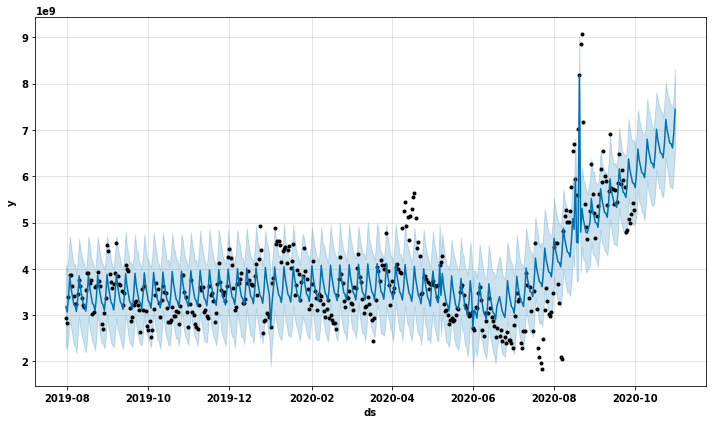

In [26]:
# fitting model that use holiday dataframe that we just defined above
model_holiday = Prophet(holidays=holiday)
model_holiday.fit(daily_total_qty)

# forecasting
future = model_holiday.make_future_dataframe(periods=31, freq='D')
forecast = model_holiday.predict(future)

# visualize
fig = model_holiday.plot(forecast)

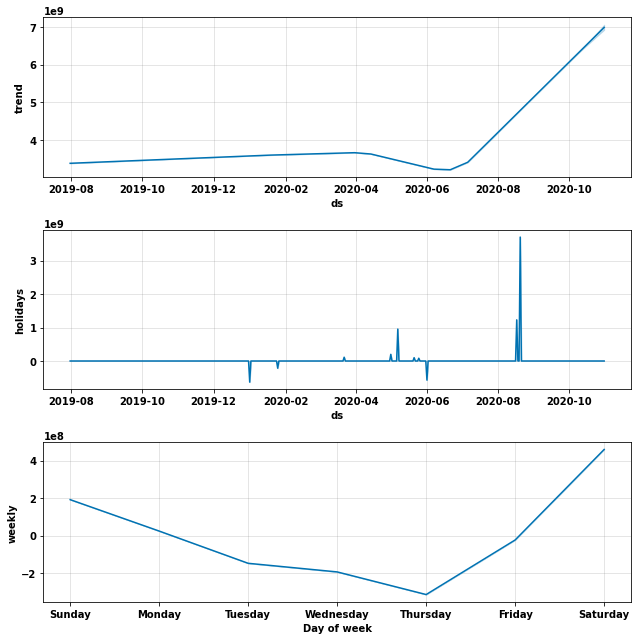

In [27]:
#plot the component
fig = model_holiday.plot_components(forecast)

# Forecasting Evaluation

Recall how we performed a visual analysis on how the performance of our forecasting model earlier. The technique was in fact, a widely used technique for model cross-validation. It involves splitting our data into two parts:

- Train data is used to train our time series model in order to acquire the underlying patterns such as trend and seasonality.
- Test data is purposely being kept for us to perform a cross-validation and see how our model perform on an **unseen data**.

The objective is quite clear, is that we are able to acquire a glimpse of what kind of error are we going to expect for the model.

In [28]:
train = daily_total_qty[daily_total_qty['ds'] < '8/31/2020']
test = daily_total_qty[daily_total_qty['ds'] >= '8/31/2020']

print(f'Train size: {train.shape}')
print(f'Test size: {test.shape}')

Train size: (394, 2)
Test size: (31, 2)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


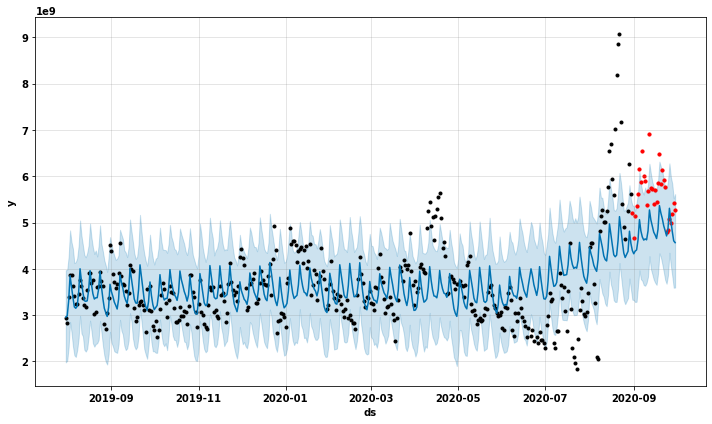

In [31]:
# fitting model
model_final = Prophet(
    holidays=holiday,
    weekly_seasonality=5) # holiday effect)
model_final.add_seasonality(name='monthly', period=30.5, fourier_order=5) # add monthly seasonality
model_final.fit(train) # only training set

# forecasting
future_final = model_final.make_future_dataframe(periods=31, freq='D') # 303 days (test size)
forecast_final = model_final.predict(future_final)

# visualize
fig = model_final.plot(forecast_final)
plt.scatter(x=test['ds'], y=test['y'], s=10, color='red')
plt.show()

## Expanding Window Cross Validation

Instead of only doing one time train-test split, we can do cross validation as shown below:

<center>
<img src="https://rahmadyatrias.files.wordpress.com/2020/04/041720_1702_crossvalida1.png?w=439&zoom=2" width="400">
</center>

This cross validation procedure is called as **expanding window** and can be done automatically by using the `cross_validation()` method. There are three parameters to be specified:

- `initial`: the length of the initial training period
- `horizon`: forecast length
- `period`: spacing between cutoff dates

# Hyperparameter Tuning

In this same section, we implement a **Grid search algorithm** for model tuning by using for-loop. It builds model for every combination from specified hyperparameters and then evaluate it. The goal is to choose a set of optimal hyperparameters which minimize the forecast error (in this case, smallest RMSLE).

💡 You can use the code template below, please change it as needed in the section marked by `TO DO`.


Click [here](https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning) for a list of recommended hyperparameters to be tuned.

In [11]:
from tqdm import tqdm
from fbprophet.diagnostics import cross_validation

import itertools
from sklearn.metrics import mean_squared_log_error

# Grid search parameters (TO DO: specify possible values)
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.5],
    'changepoint_range': [0.8, 0.95]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmsles = []  # Store the RMSLEs for each params here

# Use cross validation to evaluate all parameters
for params in tqdm(all_params):
  # fitting model
  # (TO DO: change the data and add other components: seasonality, holiday, regressor)
  model = Prophet(**params,
                  holidays=holiday)
  model.fit(daily_total_qty)

  # Expanding window cross validation (TO DO: use different values)
  cv = cross_validation(model, initial='360 days', period='31 days', horizon='20 days')
  
  # Evaluation metrics: RMSLE
  rmsle = cv.groupby('cutoff').apply(
      lambda x: mean_squared_log_error(y_true=x['y'],
                                       y_pred=x['yhat']) ** 0.5)
  
  mean_rmsle = rmsle.mean()
  rmsles.append(mean_rmsle)

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-08-10 00:00:00 and 2020-09-10 00:00:00
 17%|██████████████                                                                      | 1/6 [00:16<01:23, 16.75s/it]INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 2 forecasts with cutoffs between 2020-08-10 00:00:00 and 2020-09-10 00:00:00
 33%|████████████████████████████                                                        | 2/6 [00:31<01:04, 16.11s/it]INFO:fbprophet:Disabling yearly s

#### By the way..................
why should we choose RMSLE as the evaluation metrics? This plot below will show differences between RMSE and RMSLE 

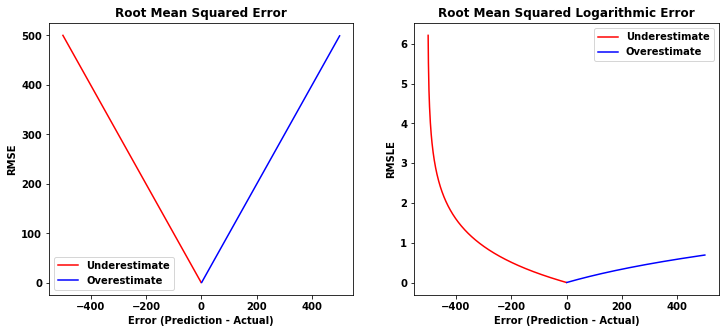

In [25]:
# for illustration purposes only
## calculation
err = np.arange(-500, 500)
p = np.arange(0, 1000)
a = p - err
rmse_plot = np.power(err, 2) ** 0.5
rmsle_plot = np.power(np.log1p(p) - np.log1p(a), 2) ** 0.5

## visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for idx, (ax, y) in enumerate(zip(axes, [rmse_plot, rmsle_plot])):
  ax.plot(err[err < 0], y[err < 0], color = 'red', label = "Underestimate")
  ax.plot(err[err > 0], y[err > 0], color = 'blue', label = "Overestimate")
  ax.set_xlabel("Error (Prediction - Actual)")
  ax.set_ylabel(f"RMS{'L' if idx else ''}E")
  ax.set_title(f"Root Mean Squared {'Logarithmic ' if idx else ''}Error")
  ax.legend()

plt.show()

- Root Mean Squared Error

<center>
$RMSE = \displaystyle{\sqrt{\frac{1}{n} \sum_{i=1}^{n}{(p_i - a_i)^2}}}$
</center>

- Root Mean Squared Logarithmic Error

<center>
$RMSLE = \displaystyle{\sqrt{\frac{1}{n} \sum_{i=1}^{n}{(log(p_i + 1) - log(a_i + 1))^2}}}$
</center>

Notation:

  - $n$: length of time series
  - $p_i$: predicted value at time $i$
  - $a_i$: actual value at time $i$

The main reason **RMSLE is prefered over RMSE** : It incurs a **larger penalty for the underestimation** of the actual value than the overestimation. This is useful for business cases where the underestimation of the target variable is not acceptable but overestimation can be tolerated.

### And as reminder, our objective is predict cash ammount that should be available in ATM (Automated Teller Machine). 
- if our prediction is **over estimate (more than actual)**, then **it's fine**. The rest of the available cash will still be saved in ATM. 
- BUT if our prediction is **under estimate (less than actual)**, then **customer satisfaction will become lower** since they need to **find other ATM to get their cash**

## Then, continue to our main process. 
We can observe the error metrics for each hyperparameter combination, and sort by ascending:

In [12]:
tuning_results = pd.DataFrame(all_params)
tuning_results['rmsle'] = rmsles
tuning_results.sort_values(by='rmsle')

,changepoint_prior_scale,changepoint_range,rmsle
5,0.500,0.95,0.234393
4,0.500,0.80,0.402141
1,0.001,0.95,0.448447
3,0.010,0.95,0.459206
0,0.001,0.80,0.466641
2,0.010,0.80,0.472943


Best hyperparameter combination can be extracted as follows:

In [13]:
best_params = all_params[np.argmin(rmsles)]
best_params

{'changepoint_prior_scale': 0.5, 'changepoint_range': 0.95}

Lastly, re-fit the model and use it for forecasting.

In [14]:
model_best = Prophet(**best_params, holidays=holiday)
model_best.fit(daily_total_qty)
model_best

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Note: `**` is an operator for dictionary unpacking. It delivers key-value pairs in a dictionary into a function's arguments.

In [15]:
forecast_best = model_best.predict(future_31)

Last, export the prediction result to excel 

In [16]:
forecast_best.to_excel("Submit BRI Hackathon CR optimization kas echannel.xlsx")

### 💡 pro tips : you also could do quick calculation in excel my multiply the column of prediction result by 1.01, 1.02, and so on. 
Try to do this several time, until the RMSLE couldn't be lower anymore. This is logical hack since over estimate is better than under estimate

# References

Prophet related:

- [Prophet Documentation](https://facebook.github.io/prophet/docs/quick_start.html)
- [Paper: Forecasting at Scale](https://peerj.com/preprints/3190/)
- [Algoritma: Time Series Forecasting using `prophet` in R](https://business-forecasting.netlify.app/#5_time_series_forecasting_using_prophet)

Further reading (for R):

- [Textbook Forecasting: Principles and Practice](https://otexts.com/fpp2/)
- [Algotech: Multiple Seasonality Time Series](https://algotech.netlify.app/blog/multiple-seasonal/)
- [Algotech: Time Series LSTM (Neural Network)](https://algotech.netlify.app/blog/time-series-prediction-with-lstm/)
- [Algotech: Multiple Time Series Model](https://algotech.netlify.app/blog/purrr-operly-fitting-multiple-time-series-model/)

